In [454]:
# Import necessary libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Set floating point precision option for pandas
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Import seaborn library and set context and style
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

# Import warnings and set filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import time library
from time import time

# Import matplotlib ticker and scipy stats
import matplotlib.ticker as tkr
from scipy import stats

# Import statistical tools for time series analysis
from statsmodels.tsa.stattools import adfuller

# Import preprocessing from sklearn
from sklearn import preprocessing

# Import partial autocorrelation function from statsmodels
from statsmodels.tsa.stattools import pacf

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

# Import math library
import math

# Import necessary functions from keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import Callback

# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Import mean squared error and mean absolute error from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping

In [571]:
# Load the data from the file 'household_power_consumption.txt' using pandas
# and specify the delimiter as ';'

#file_path = 'C:/path/to/your/file.csv'
#file_path = 'E:/Study/Rsearch/## UKM Masters/#Processed London Dataset/DailyDataset/SmartMeterID_of_Block_0/Block_0_MAC000450.csv'

data = pd.read_csv('Block_1_MAC000323.csv')
#data = pd.read_csv(file_path)

# Print the number of rows and columns in the data
print('Number of rows and columns:', data.shape)

# Display the first 5 rows of the data
data.head(5)

Number of rows and columns: (725, 9)


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000323,3/6/2012,0.5460,0.5677,0.9080,20,0.2358,11.3540,0.1380
1,MAC000323,3/7/2012,0.2195,0.3861,1.4750,48,0.3483,18.5310,0.0540
2,MAC000323,3/8/2012,0.1695,0.2909,1.0860,48,0.2628,13.9650,0.0560
3,MAC000323,3/9/2012,0.2605,0.4238,1.5870,48,0.4022,20.3430,0.0680
4,MAC000323,3/10/2012,0.2680,0.3738,1.2220,48,0.3085,17.9430,0.0610


In [572]:
# Display the last 5 rows of the data
data.tail(5)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
720,MAC000323,2/24/2014,0.1605,0.2457,1.0540,48,0.2230,11.7940,0.0450
721,MAC000323,2/25/2014,0.1445,0.3025,1.5270,48,0.3452,14.5210,0.0440
722,MAC000323,2/26/2014,0.1215,0.2160,1.0190,48,0.2540,10.3700,0.0430
723,MAC000323,2/27/2014,0.1435,0.2402,0.8720,48,0.2181,11.5300,0.0440
724,MAC000323,2/28/2014,0.3340,0.3340,0.3340,1,NaN,0.3340,0.3340


In [573]:
print("\nInformation about the dataframe:")
print(data.info())


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LCLid          725 non-null    object 
 1   day            725 non-null    object 
 2   energy_median  725 non-null    float64
 3   energy_mean    725 non-null    float64
 4   energy_max     725 non-null    float64
 5   energy_count   725 non-null    int64  
 6   energy_std     724 non-null    float64
 7   energy_sum     725 non-null    float64
 8   energy_min     725 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 51.1+ KB
None


In [574]:
print("\nData type of each column in the dataframe:")
print(data.dtypes)


Data type of each column in the dataframe:
LCLid             object
day               object
energy_median    float64
energy_mean      float64
energy_max       float64
energy_count       int64
energy_std       float64
energy_sum       float64
energy_min       float64
dtype: object


In [575]:
#Feature Engineering

data['date_time'] = pd.to_datetime(data['day'])

# Convert the 'Global_active_power' column to numeric format
# and remove any rows with NaN values
data['energy_sum'] = pd.to_numeric(data['energy_sum'], errors='coerce')
data = data.dropna(subset=['energy_sum'])

# Create new columns for year, quarter, month, and day
data['year'] = data['date_time'].apply(lambda x: x.year)
data['quarter'] = data['date_time'].apply(lambda x: x.quarter)
data['month'] = data['date_time'].apply(lambda x: x.month)
data['day'] = data['date_time'].apply(lambda x: x.day)

# Keep only the columns 'date_time', 'Global_active_power', 'year', 'quarter', 'month', 'day'
data = data.loc[:,['date_time','energy_sum', 'year','quarter','month','day']]

# Sort the data by date_time in ascending order
data.sort_values('date_time', inplace=True, ascending=True)

# Reset the index of the data
data = data.reset_index(drop=True)

# Create a new column 'weekday' that indicates if the day is a weekday (1) or weekend (0)
data['weekday'] = data['date_time'].apply(lambda x: x.weekday() < 5).astype(int)

In [576]:
# Print the number of rows and columns in the data
print('Number of rows and columns:', data.shape)

# Print the minimum and maximum date_time values
print('Minimum date_time:', data.date_time.min())
print('Maximum date_time:', data.date_time.max())

# Display the last 5 rows of the data
data.tail(5)

Number of rows and columns: (725, 7)
Minimum date_time: 2012-03-06 00:00:00
Maximum date_time: 2014-02-28 00:00:00


,date_time,energy_sum,year,quarter,month,day,weekday
720,2014-02-24,11.7940,2014,1,2,24,1
721,2014-02-25,14.5210,2014,1,2,25,1
722,2014-02-26,10.3700,2014,1,2,26,1
723,2014-02-27,11.5300,2014,1,2,27,1
724,2014-02-28,0.3340,2014,1,2,28,1


In [577]:
# Display the last 5 rows of the data
data.head(10)

,date_time,energy_sum,year,quarter,month,day,weekday
0,2012-03-06,11.3540,2012,1,3,6,1
1,2012-03-07,18.5310,2012,1,3,7,1
2,2012-03-08,13.9650,2012,1,3,8,1
3,2012-03-09,20.3430,2012,1,3,9,1
4,2012-03-10,17.9430,2012,1,3,10,0
5,2012-03-11,19.1430,2012,1,3,11,0
6,2012-03-12,24.2310,2012,1,3,12,1
7,2012-03-13,13.6950,2012,1,3,13,1
8,2012-03-14,5.9590,2012,1,3,14,1
9,2012-03-15,5.8560,2012,1,3,15,1


In [578]:
data.drop_duplicates(subset=['date_time'], keep='first')

,date_time,energy_sum,year,quarter,month,day,weekday
0,2012-03-06,11.3540,2012,1,3,6,1
1,2012-03-07,18.5310,2012,1,3,7,1
2,2012-03-08,13.9650,2012,1,3,8,1
3,2012-03-09,20.3430,2012,1,3,9,1
4,2012-03-10,17.9430,2012,1,3,10,0
...,...,...,...,...,...,...,...
720,2014-02-24,11.7940,2014,1,2,24,1
721,2014-02-25,14.5210,2014,1,2,25,1
722,2014-02-26,10.3700,2014,1,2,26,1
723,2014-02-27,11.5300,2014,1,2,27,1


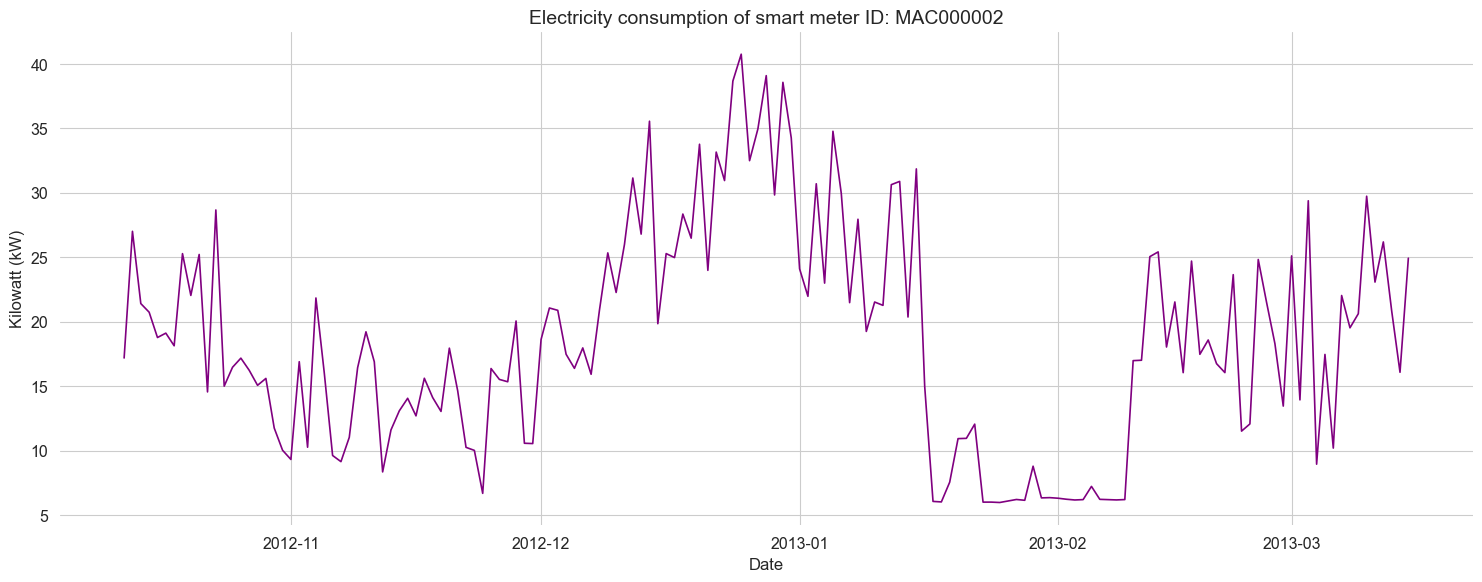

In [579]:
#Exploratory Data Analysis(EDA)

data1 = data[(data.date_time >= '2012-10-12') & (data.date_time < '2013-03-16')]

plt.figure(figsize=(15,6))
plt.plot(data1.date_time, data1.energy_sum, color='purple')
plt.ylabel('Kilowatt (kW)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Electricity consumption of smart meter ID: MAC000002', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()

In [580]:
#Transform the Global_active_power column of the data DataFrame into a numpy array of float values

dataset = data.energy_sum.values.astype('float32')
#Reshape the numpy array into a 2D array with 1 column

dataset = np.reshape(dataset, (-1, 1))
#Create an instance of the MinMaxScaler class to scale the values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
#Fit the MinMaxScaler to the transformed data and transform the values

dataset = scaler.fit_transform(dataset)
#Split the transformed data into a training set (80%) and a test set (20%)

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [581]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [582]:
# reshape into X=t and Y=t+1
look_back = 20
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [583]:
X_train.shape

(559, 20)

In [584]:
Y_train.shape

(559,)

In [585]:
X_train

array([[0.2725901 , 0.45011994, 0.33717564, ..., 0.13698766, 0.13550349,
        0.13354935],
       [0.45011994, 0.33717564, 0.49494147, ..., 0.13550349, 0.13354935,
        0.13478616],
       [0.33717564, 0.49494147, 0.43557525, ..., 0.13354935, 0.13478616,
        0.18678111],
       ...,
       [0.24496007, 0.5590323 , 0.51131666, ..., 0.22245033, 0.15464912,
        0.3751948 ],
       [0.5590323 , 0.51131666, 0.40519947, ..., 0.15464912, 0.3751948 ,
        0.2507235 ],
       [0.51131666, 0.40519947, 0.25745168, ..., 0.3751948 , 0.2507235 ,
        0.52039474]], dtype=float32)

In [586]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [587]:
# Define the MAPE Callback
class AverageMapeCallback(Callback):
    def __init__(self, validation_data):
        super(AverageMapeCallback, self).__init__()
        self.validation_data = validation_data
        self.mape_values = []

    def on_epoch_end(self, epoch, logs=None):
        # Get predictions on the validation set
        y_pred = self.model.predict(self.validation_data[0])
        # Calculate MAPE
        mape = np.mean(np.abs((self.validation_data[1] - y_pred) / self.validation_data[1])) * 100
        self.mape_values.append(mape)
        print(f"Epoch {epoch + 1}: MAPE = {mape:.4f}")

    def on_train_end(self, logs=None):
        # Calculate and print average MAPE across all epochs
        average_mape = np.mean(self.mape_values)
        print(f"Average Mean Absolute Percentage Error (MAPE): {average_mape:.4f}")

# Initialize the Average MAPE callback with validation data
mape_callback = AverageMapeCallback(validation_data=(X_test, Y_test))

In [588]:
# LSTM Model
# Defining the LSTM model
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD

timesteps, features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[0]
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(timesteps, features),  return_sequences=False, dropout=0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'accuracy'])
print(model.summary())
history = model.fit(X_train, Y_train, epochs=300, batch_size=50, validation_data=(X_test, Y_test), 
        callbacks=[EarlyStopping(monitor='val_loss', patience=25),mape_callback], verbose=2, shuffle=False)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 50)                14200     
                                                                 
 dense_25 (Dense)            (None, 1)                 51        
                                                                 
Total params: 14251 (55.67 KB)
Trainable params: 14251 (55.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/300
4/4 [==============================] - 1s 6ms/step
Epoch 1: MAPE = 57.2524
12/12 - 59s - loss: 0.0692 - mae: 0.2138 - accuracy: 0.0000e+00 - val_loss: 0.0422 - val_mae: 0.1612 - val_accuracy: 0.0000e+00 - 59s/epoch - 5s/step
Epoch 2/300
4/4 [==============================] - 0s 7ms/step
Epoch 2: MAPE = 74.4050
12/12 - 0s - loss: 0.0286 - mae: 0.1303 - accuracy: 0.0000e+00 - val_loss: 0.0465 - 

Epoch 33/300
4/4 [==============================] - 0s 6ms/step
Epoch 33: MAPE = 62.6244
12/12 - 0s - loss: 0.0173 - mae: 0.1027 - accuracy: 0.0018 - val_loss: 0.0296 - val_mae: 0.1333 - val_accuracy: 0.0000e+00 - 485ms/epoch - 40ms/step
Epoch 34/300
4/4 [==============================] - 0s 8ms/step
Epoch 34: MAPE = 61.7541
12/12 - 0s - loss: 0.0184 - mae: 0.1055 - accuracy: 0.0018 - val_loss: 0.0294 - val_mae: 0.1330 - val_accuracy: 0.0000e+00 - 377ms/epoch - 31ms/step
Epoch 35/300
4/4 [==============================] - 0s 7ms/step
Epoch 35: MAPE = 61.2565
12/12 - 0s - loss: 0.0183 - mae: 0.1049 - accuracy: 0.0018 - val_loss: 0.0293 - val_mae: 0.1328 - val_accuracy: 0.0000e+00 - 476ms/epoch - 40ms/step
Epoch 36/300
4/4 [==============================] - 0s 5ms/step
Epoch 36: MAPE = 62.8059
12/12 - 0s - loss: 0.0195 - mae: 0.1073 - accuracy: 0.0018 - val_loss: 0.0295 - val_mae: 0.1330 - val_accuracy: 0.0000e+00 - 389ms/epoch - 32ms/step
Epoch 37/300
4/4 [==============================

Epoch 68/300
4/4 [==============================] - 0s 7ms/step
Epoch 68: MAPE = 61.9691
12/12 - 0s - loss: 0.0182 - mae: 0.1023 - accuracy: 0.0018 - val_loss: 0.0291 - val_mae: 0.1320 - val_accuracy: 0.0000e+00 - 378ms/epoch - 31ms/step
Epoch 69/300
4/4 [==============================] - 0s 5ms/step
Epoch 69: MAPE = 61.7677
12/12 - 0s - loss: 0.0170 - mae: 0.1005 - accuracy: 0.0018 - val_loss: 0.0290 - val_mae: 0.1317 - val_accuracy: 0.0000e+00 - 390ms/epoch - 32ms/step
Epoch 70/300
4/4 [==============================] - 0s 7ms/step
Epoch 70: MAPE = 62.0021
12/12 - 0s - loss: 0.0186 - mae: 0.1070 - accuracy: 0.0018 - val_loss: 0.0290 - val_mae: 0.1316 - val_accuracy: 0.0000e+00 - 454ms/epoch - 38ms/step
Epoch 71/300
4/4 [==============================] - 0s 6ms/step
Epoch 71: MAPE = 63.4919
12/12 - 0s - loss: 0.0173 - mae: 0.1031 - accuracy: 0.0018 - val_loss: 0.0292 - val_mae: 0.1319 - val_accuracy: 0.0000e+00 - 392ms/epoch - 33ms/step
Epoch 72/300
4/4 [==============================

Epoch 103/300
4/4 [==============================] - 0s 5ms/step
Epoch 103: MAPE = 60.8898
12/12 - 0s - loss: 0.0183 - mae: 0.1050 - accuracy: 0.0018 - val_loss: 0.0290 - val_mae: 0.1318 - val_accuracy: 0.0000e+00 - 394ms/epoch - 33ms/step
Epoch 104/300
4/4 [==============================] - 0s 6ms/step
Epoch 104: MAPE = 62.6410
12/12 - 0s - loss: 0.0171 - mae: 0.1015 - accuracy: 0.0018 - val_loss: 0.0291 - val_mae: 0.1318 - val_accuracy: 0.0000e+00 - 327ms/epoch - 27ms/step
Epoch 105/300
4/4 [==============================] - 0s 5ms/step
Epoch 105: MAPE = 61.7819
12/12 - 0s - loss: 0.0180 - mae: 0.1053 - accuracy: 0.0018 - val_loss: 0.0290 - val_mae: 0.1315 - val_accuracy: 0.0000e+00 - 371ms/epoch - 31ms/step
Epoch 106/300
4/4 [==============================] - 0s 6ms/step
Epoch 106: MAPE = 61.9249
12/12 - 0s - loss: 0.0171 - mae: 0.1024 - accuracy: 0.0018 - val_loss: 0.0291 - val_mae: 0.1317 - val_accuracy: 0.0000e+00 - 343ms/epoch - 29ms/step
Epoch 107/300
4/4 [=====================

In [589]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

4/4 [==============================] - 0s 5ms/step


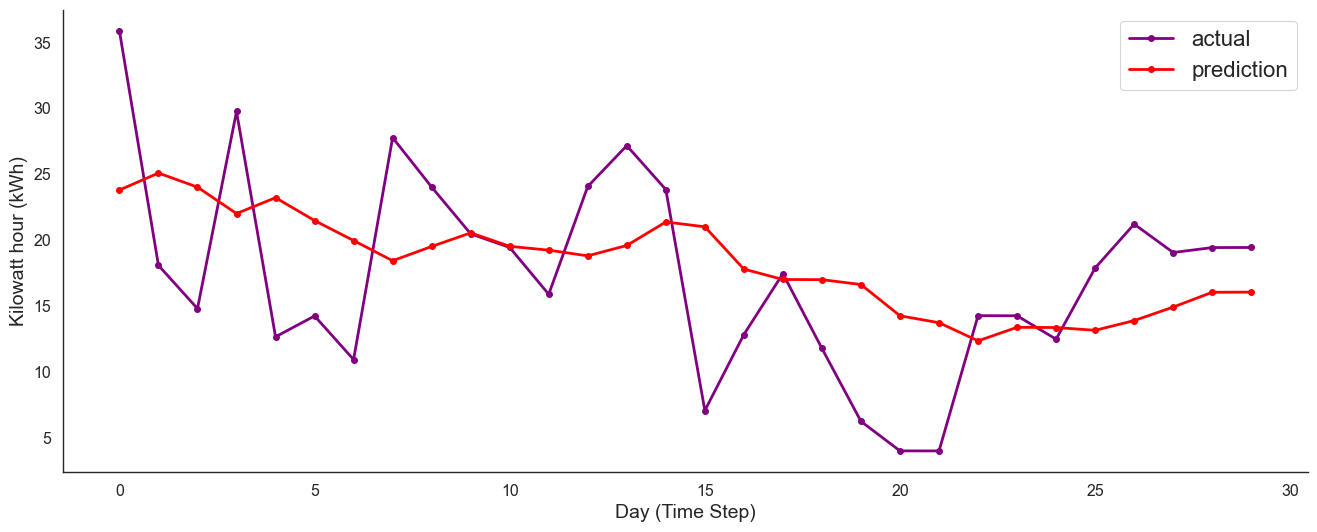

In [590]:
aa=[x for x in range(30)]
# Creating a figure object with desired figure size
#plt.rcParams.update({'font.size': 100})
                    
plt.figure(figsize=(15,6))

# Plotting the actual values in blue with a dot marker
#plt.plot(aa, Y_test[0][:30], marker='.', label="history", color='purple')

plt.plot(aa, Y_test[0][:30], linewidth=2, marker='.', label="actual", color='purple', markersize=8)

# Plotting the predicted values in green with a solid line
plt.plot(aa, test_predict[:,0][:30], linewidth=2, marker='.', label="prediction", color='red', markersize=8)

# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Kilowatt hour (kWh)', size=14)

# Labeling the x-axis
plt.xlabel('Day (Time Step)', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

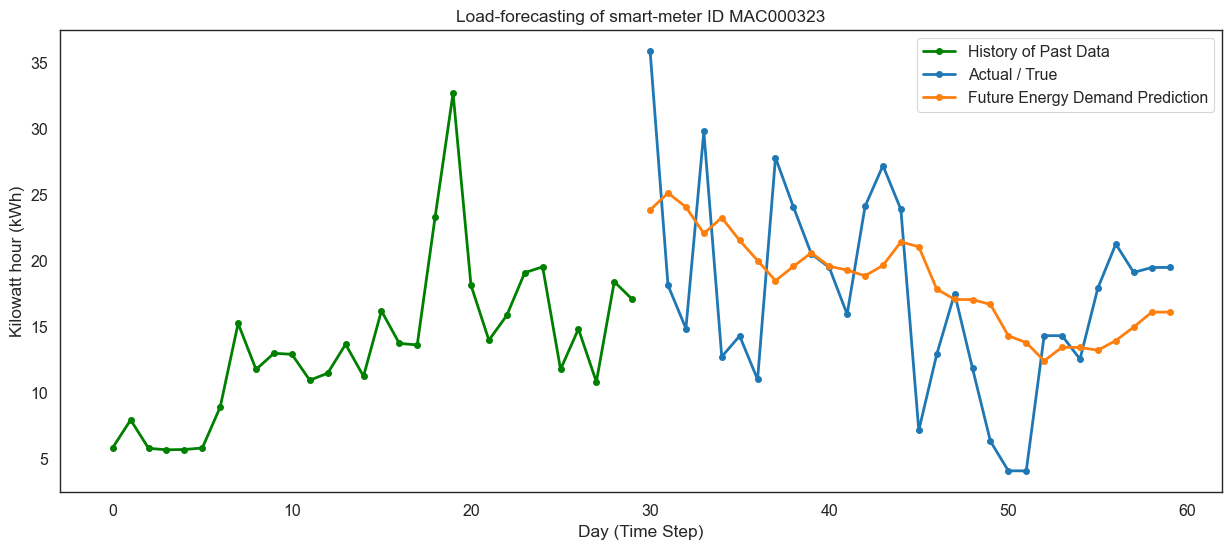

In [592]:
import matplotlib.pyplot as plt1

aa=[x for x in range(30)]
plt1.figure(figsize=(15,6))
#plt.rcParams.update({'font.size': 100})
plt1.plot(np.arange(0, len(Y_train[0][:30])), Y_train[0][:30], 'g', linewidth=2, marker='.', label="History of Past Data", markersize=8)
plt1.plot(np.arange(len(Y_train[0][:30]), len(Y_train[0][:30]) + len(Y_test[0][:30])), Y_test[0][:30], linewidth=2, marker='.', label="Actual / True", markersize=8)
plt1.plot(np.arange(len(Y_train[0][:30]), len(Y_train[0][:30]) + len(Y_test[0][:30])), test_predict[:,0][:30], linewidth=2, marker='.', label="Future Energy Demand Prediction", markersize=8)
plt1.ylabel('Kilowatt hour (kWh)')
plt1.xlabel('Day (Time Step)')
plt1.title('Load-forecasting of smart-meter ID MAC000323')
plt1.legend()
plt1.show();

In [593]:
losses = history.history['loss']

# Calculate the average loss across all epochs
average_loss = np.mean(losses)
print(average_loss) #mse

0.01902789947718887


In [594]:
val_losses = history.history['val_loss']

# Calculate the average loss across all epochs
average_val_loss = np.mean(val_losses)
print(average_val_loss) #mse

0.030028990217310897


In [595]:
# Calculate overall MSE (simple average)
overall_mse = (average_loss + average_val_loss) / 2
print("Overall MSE (Simple Average):", overall_mse)

Overall MSE (Simple Average): 0.024528444847249885


In [596]:
accuracy = 100 - overall_mse
print("MSE based Accuracy:", accuracy, "%")

MSE based Accuracy: 99.97547155515275 %


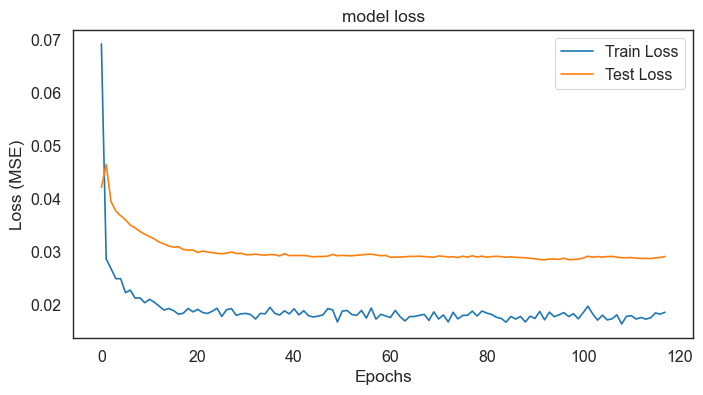

In [597]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show();

In [451]:
# Calculate RMSE
rmse_value = np.sqrt(overall_mse)

print("RMSE:", rmse_value)
accuracy = 100 - rmse_value
print("RMSE based Accuracy:", accuracy, "%")

RMSE: 0.1067633957555224
RMSE based Accuracy: 99.89323660424448 %


In [452]:
mae_train = history.history['mae']          # MAE for training set
mae_test = history.history['val_mae']
average_mae_train = np.mean(mae_train)
average_mae_test = np.mean(mae_test)
print("Training MAE:", average_mae_train)
print("Validation or Test MAE:", average_mae_test)

overall_mae = (average_mae_train + average_mae_test) / 2
print("Overall MAE (Simple Average):", overall_mae)

accuracy = 100 - overall_mae
print("MAE based Accuracy:", accuracy, "%")

Training MAE: 0.09585890871814534
Validation or Test MAE: 0.06709850372015676
Overall MAE (Simple Average): 0.08147870621915104
MAE based Accuracy: 99.91852129378086 %
